# Pandas problems

### P1: Babynames vote
You and your spouse decided to let the internet name your next child. You’ve asked the great people of the web to submit their favorite names, and you’ve compiled their submissions into a Series called babynames
Determine how many people voted for the names ‘Chad’, ‘Ruger’, and ‘Zeltron’

In [2]:
import numpy as np
import pandas as pd

babynames = pd.Series([
    'Jathonathon', 'Zeltron', 'Ruger', 'Phreddy', 'Ruger', 'Chad', 'Chad',
    'Ruger', 'Ryan', 'Ruger', 'Chad', 'Ryan', 'Phreddy', 'Phreddy', 'Phreddy',
    'Mister', 'Zeltron', 'Ryan', 'Ruger', 'Ruger', 'Jathonathon',
    'Jathonathon', 'Ruger', 'Chad', 'Zeltron'], dtype='string')

In [3]:
babynames.value_counts().loc[['Ruger', 'Chad', 'Zeltron']]

Ruger      7
Chad       4
Zeltron    3
Name: count, dtype: Int64

### Bees Knees Problem
Given, two Series bees and knees, if the ith value of bees is NaN, double the ith value inside knees.

In [4]:
bees = pd.Series([True, True, False, np.nan, True, False, True, np.nan])
knees = pd.Series([5,2,9,1,3,10,5,2], index = [7,0,2,6,3,5,1,4])

In [5]:
# knees.loc[pd.isna(bees).to_numpy()] *= 2 In newer Pandas versions (v1.3.0+), using .loc with a boolean array requires index alignment, 
# not just positional matching.

In [6]:
knees.loc[bees[bees.isna()].index.to_numpy()] *=2

In [7]:
print(knees)

7    10
0     2
2     9
6     1
3     6
5    10
1     5
4     2
dtype: int64


### Car Shopping Problem (To learn)
After accidentally leaving an ice chest of fish and shrimp in your car for a week while you were on vacation, you’re now in the market for a new vehicle 🚗. Your insurance didn’t cover the loss, so you want to make sure you get a good deal on your new car.

Given a Series of car asking_prices and another Series of car fair_prices, determine which cars for sale are a good deal. In other words, identify cars whose asking price is less than their fair price.

The result should be a list of integer indices corresponding to the good deals in asking_prices.

In [8]:
asking_prices = pd.Series([5000, 7600, 9000, 8500, 7000], index=['civic', 'civic', 'camry', 'mustang', 'mustang'])
fair_prices = pd.Series([5500, 7500, 7500], index=['civic', 'mustang', 'camry'])

In [9]:
deals =(asking_prices - fair_prices)

In [10]:
good_deals = deals[deals<0]
good_deals

civic     -500
mustang   -500
dtype: int64

In [11]:
all_fair_prices = fair_prices.loc[asking_prices.index]
off_market_prices = asking_prices - all_fair_prices
below_fair_prices  = (off_market_prices < 0).reset_index(drop=True)
below_fair_prices.loc[below_fair_prices].index.to_list()

[0, 4]

In [12]:
# Using pandas dataframe

# Creating merged table

market = asking_prices.to_frame().rename(columns= {0: 'asking_prices'}).merge( 
    fair_prices.to_frame(), how= 'left', left_index= True, right_index= True).rename(
    columns= {0: 'fair_prices'}
).reset_index()
market

,index,asking_prices,fair_prices
0,civic,5000,5500
1,civic,7600,5500
2,camry,9000,7500
3,mustang,8500,7500
4,mustang,7000,7500


In [13]:
market[market.asking_prices < market.fair_prices].index.to_list()

[0, 4]

#### Price Gouging Problem
You suspect your local grocery’s been price gouging the ground beef. You and some friends decide to track the price of ground beef every day for 10 days. You’ve compiled the data into a Series called beef_prices, whose index represents the day of each recording.

For example, beef was priced 3.37 on the first day, 4.64 on the second day, etc.

Determine which day had the biggest price increase from the prior day.

In [14]:
generator = np.random.default_rng(123)
beef_prices = pd.Series(
    data = np.round(generator.uniform(low=3, high=5, size=10), 2),
    index = generator.choice(10, size=10, replace=False)
)

In [15]:
print(beef_prices)

4    4.36
8    3.11
2    3.44
0    3.37
6    3.35
9    4.62
3    4.85
5    3.55
1    4.64
7    4.78
dtype: float64


In [16]:
beef_prices.sort_index(inplace= True)
beef_prices_prev = beef_prices.shift(periods = 1 )
beef_price_increase = beef_prices - beef_prices_prev
beef_price_increase.idxmax()

9

#### Fair Teams Problem
You’re organizing a competitive rock-skipping league. 6 coaches and 20 players have signed up. Your job is to randomly and fairly determine the teams, assigning players to coaches. Keep in mind that some teams will have three players and some teams will have four players. Given a Series of coaches and a Series of players, create a Series of random coach-to-player mappings. The resulting Series should have coach names in its index and corresponding player names in its values.


Result:
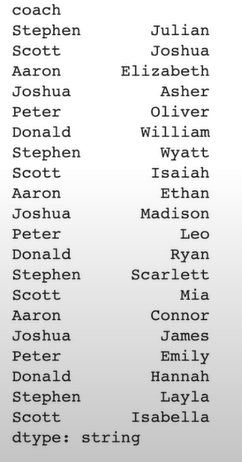

In [17]:
coaches = pd.Series(['Aaron', 'Donald', 'Joshua', 'Peter', 'Scott', 'Stephen'], dtype='string')
players = pd.Series(['Asher', 'Connor', 'Elizabeth', 'Emily', 'Ethan', 'Hannah', 'Isabella', 'Isaiah', 'James',
                     'Joshua', 'Julian', 'Layla', 'Leo', 'Madison', 'Mia', 'Oliver', 'Ryan', 'Scarlett', 'William',
                     'Wyatt'], dtype='string')

#### Hobbies Problem
You polled five heterosexual couples on their hobbies.
For each couple, determine what hobbies each man has that his wife doesn’t and what hobbies each woman has that her husband doesn’t.

In [18]:
couples = pd.DataFrame({
    'man': [
        ['fishing', 'biking', 'reading'],
        ['hunting', 'mudding', 'fishing'],
        ['reading', 'movies', 'running'],
        ['running', 'reading', 'biking', 'mudding'],
        ['movies', 'reading', 'yodeling']
    ],
    'woman': [
        ['biking', 'reading', 'movies'],
        ['fishing', 'drinking'],
        ['knitting', 'reading'],
        ['running', 'biking', 'fishing', 'movies'],
        ['movies']
    ]
})

In [19]:
couples

,man,woman
0,"[fishing, biking, reading]","[biking, reading, movies]"
1,"[hunting, mudding, fishing]","[fishing, drinking]"
2,"[reading, movies, running]","[knitting, reading]"
3,"[running, reading, biking, mudding]","[running, biking, fishing, movies]"
4,"[movies, reading, yodeling]",[movies]


In [20]:
def diff(man: list, woman: list)-> (list, list): 
    man_only = [h for h in man if h not in woman]
    woman_only = [h for h in woman if h not in man]
    return man_only, woman_only
couples1 = pd.DataFrame()

In [21]:
# Apply the 'diff' function to each row in the DataFrame
couples1[['man_only', 'woman_only']] = couples.apply(lambda row: pd.Series(diff(row['man'], row['woman'])), axis=1)
couples1

,man_only,woman_only
0,[fishing],[movies]
1,"[hunting, mudding]",[drinking]
2,"[movies, running]",[knitting]
3,"[reading, mudding]","[fishing, movies]"
4,"[reading, yodeling]",[]


In [22]:
# Usage & application of apply map- efficient through usage of set instead of loops



In [23]:
sets_df = couples.applymap(set)
sets_df

C:\Users\986hi\AppData\Local\Temp\ipykernel_20812\424699254.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sets_df = couples.applymap(set)


,man,woman
0,"{biking, fishing, reading}","{biking, movies, reading}"
1,"{mudding, fishing, hunting}","{fishing, drinking}"
2,"{movies, reading, running}","{reading, knitting}"
3,"{biking, mudding, reading, running}","{biking, movies, fishing, running}"
4,"{movies, reading, yodeling}",{movies}


In [24]:
woman_only = sets_df.diff(axis= 1).drop('man', axis=1)
woman_only

,woman
0,{movies}
1,{drinking}
2,{knitting}
3,"{movies, fishing}"
4,{}


In [25]:
man_only = sets_df.diff(axis= 1, periods= -1).drop('woman', axis=1)
man_only

,man
0,{fishing}
1,"{mudding, hunting}"
2,"{movies, running}"
3,"{mudding, reading}"
4,"{reading, yodeling}"


#### Party Time Problem (To learn creative dicing and usage of cummulative functions)
Whenever your friends John and Judy visit you together, y’all have a party 🥳. Given a DataFrame with 10 rows representing the next 10 days of your schedule and whether John and Judy are scheduled to make an appearance, insert a new column called days_til_party that indicates how many days until the next party.

In [26]:

generator = np.random.default_rng(123)
df = pd.DataFrame({
    'john': generator.choice([True, False], size=10, replace=True),
    'judy': generator.choice([True, False], size=10, replace=True)
})
print(df)

    john   judy
0   True   True
1  False  False
2  False   True
3   True  False
4  False   True
5   True   True
6   True  False
7   True  False
8   True  False
9   True  False


In [27]:
both_appearing = df.john & df.judy
both_appearing

0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
dtype: bool

In [28]:
type(both_appearing)

pandas.core.series.Series

In [29]:
rev = both_appearing.iloc[::-1]
party_count = rev.cumsum() #Calculates groups or party number

In [30]:
df['days_till_party'] = both_appearing.groupby(party_count).cumcount(ascending= False) 

In [31]:
df

,john,judy,days_till_party
0,True,True,0
1,False,False,4
2,False,True,3
3,True,False,2
4,False,True,1
5,True,True,0
6,True,False,3
7,True,False,2
8,True,False,1
9,True,False,0


In [32]:
# Correcting days count after last party

df.loc[ (both_appearing.loc[both_appearing].index[-1]+1):, 'days_till_party'] = pd.NA
df

,john,judy,days_till_party
0,True,True,0.0
1,False,False,4.0
2,False,True,3.0
3,True,False,2.0
4,False,True,1.0
5,True,True,0.0
6,True,False,NaN
7,True,False,NaN
8,True,False,NaN
9,True,False,NaN


#### Cradle Robbers Problem
Given a DataFrame of married couples and a separate DataFrame with each person’s age, identify “cradle robbers”, people:

who are at least 20 years older than their spouse and
whose spouse is under the age of 30

In [33]:
couples = pd.DataFrame({
    'person1': ['Cody', 'Dustin', 'Peter', 'Adam', 'Ryan', 'Brian', 'Jordan', 'Gregory'],
    'person2': ['Sarah', 'Amber', 'Brianna', 'Caitlin', 'Rachel', 'Kristen', 'Alyssa', 'Morgan']
}).convert_dtypes()

ages = pd.DataFrame({
    'person': ['Adam', 'Alyssa', 'Amber', 'Brian', 'Brianna', 'Caitlin', 'Cody', 'Dustin', 'Gregory', 'Jordan',
               'Kristen', 'Rachel', 'Morgan', 'Peter', 'Ryan', 'Sarah'],
    'age': [62, 40, 41, 50, 65, 29, 27, 39, 42, 39, 33, 61, 43, 55, 28, 36]
}).convert_dtypes()

print(couples)

   person1  person2
0     Cody    Sarah
1   Dustin    Amber
2    Peter  Brianna
3     Adam  Caitlin
4     Ryan   Rachel
5    Brian  Kristen
6   Jordan   Alyssa
7  Gregory   Morgan


#### Potholes Problem (To learn)
Fed up with your city’s roads, you go around collecting data on potholes in your area. Due to an unfortunate ☕ coffee spill, you lost bits and pieces of your data.

In [34]:
potholes = pd.DataFrame({
    'length':[5.1, np.nan, 6.2, 4.3, 6.0, 5.1, 6.5, 4.3, np.nan, np.nan],
    'width':[2.8, 5.8, 6.5, 6.1, 5.8, np.nan, 6.3, 6.1, 5.4, 5.0],
    'depth':[2.6, np.nan, 4.2, 0.8, 2.6, np.nan, 3.9, 4.8, 4.0, np.nan],
    'location':pd.Series(['center', 'north edge', np.nan, 'center', 'north edge', 'center', 'west edge',
                          'west edge', np.nan, np.nan], dtype='string')
})

print(potholes)

   length  width  depth    location
0     5.1    2.8    2.6      center
1     NaN    5.8    NaN  north edge
2     6.2    6.5    4.2        <NA>
3     4.3    6.1    0.8      center
4     6.0    5.8    2.6  north edge
5     5.1    NaN    NaN      center
6     6.5    6.3    3.9   west edge
7     4.3    6.1    4.8   west edge
8     NaN    5.4    4.0        <NA>
9     NaN    5.0    NaN        <NA>


In [35]:
potholes.dropna(thresh= 2,inplace= True)

In [36]:
pt = potholes.drop('location', axis= 1)

In [37]:
potholes.fillna(potholes.select_dtypes(include='number').mean(), inplace=True)
potholes

,length,width,depth,location
0,5.100000,2.8,2.600000,center
1,5.357143,5.8,3.271429,north edge
2,6.200000,6.5,4.200000,<NA>
3,4.300000,6.1,0.800000,center
4,6.000000,5.8,2.600000,north edge
5,5.100000,5.6,3.271429,center
6,6.500000,6.3,3.900000,west edge
7,4.300000,6.1,4.800000,west edge
8,5.357143,5.4,4.000000,<NA>


#### Class Transitions Problem (Usage of transform & learn using function application by passing onto operation)
You have a DataFrame called schedules that represents the daily schedule of each student in a school. For example, If Ryan attends four classes - math, english, history, and chemistry, your schedules DataFrame will have four rows for Ryan in the order he attends each class.

You have this theory that the sequence of class-to-class transitions affects students' grades. For instance, you suspect Ryan would do better in his Chemistry class if it immediately followed his Math class instead of his History class.

Determine the average and median Chemistry grade for groups of students based on the class they have immediately prior to Chemistry. Also report how many students fall into each group.

Transform vs aggregate is analogous to window function and group by in sql

In [38]:
generator = np.random.default_rng(seed=1234)
classes = ['english', 'math', 'history', 'chemistry', 'gym', 'civics', 'writing', 'engineering']

schedules = pd.DataFrame({
    'student_id':np.repeat(np.arange(100), 4),
    'class':generator.choice(classes, size=400, replace=True)
}).drop_duplicates()
schedules['grade'] = generator.integers(101, size=schedules.shape[0])

print(schedules)

     student_id        class  grade
0             0  engineering     86
3             0    chemistry     75
4             1         math     85
5             1  engineering      0
6             1      english     73
..          ...          ...    ...
394          98      writing     16
395          98       civics     89
396          99  engineering     90
398          99         math     55
399          99      history     31

[339 rows x 3 columns]


In [39]:
df = schedules.groupby(by = 'student_id').shift(periods= 1)
df

,class,grade
0,NaN,NaN
3,engineering,86.0
4,NaN,NaN
5,math,85.0
6,engineering,0.0
...,...,...
394,math,59.0
395,writing,16.0
396,NaN,NaN
398,engineering,90.0


#### Rose Thorn Problem (must do)
You developed a multiplayer indie game called 🌹 Rose Thorn. Players compete in one of two venues - the ocean or the desert. You track the outcome of five games between three players in a DataFrame called games.

Now you want to analyze the data. Convert the games DataFrame into a new DataFrame that identifies how many times each (player, placement) occurs per venue, specifically with venue as the row index and (player, placed) as the column MultiIndex.



In [40]:
games = pd.DataFrame({
    'bella1':   ['2nd', '3rd', '1st', '2nd', '3rd'],
    'billybob': ['1st', '2nd', '2nd', '1st', '2nd'],
    'nosoup4u': ['3rd', '1st', '3rd', '3rd', '3rd'],
    'venue': ['desert', 'ocean', 'desert', 'ocean', 'desert']
})

print(games)

  bella1 billybob nosoup4u   venue
0    2nd      1st      3rd  desert
1    3rd      2nd      1st   ocean
2    1st      2nd      3rd  desert
3    2nd      1st      3rd   ocean
4    3rd      2nd      3rd  desert


In [44]:
step1 = games.melt(id_vars= 'venue', var_name= 'player', value_name= 'placed')
step1

,venue,player,placed
0,desert,bella1,2nd
1,ocean,bella1,3rd
2,desert,bella1,1st
3,ocean,bella1,2nd
4,desert,bella1,3rd
5,desert,billybob,1st
6,ocean,billybob,2nd
7,desert,billybob,2nd
8,ocean,billybob,1st
9,desert,billybob,2nd


In [49]:
# Converting columns to categorical dtype to include even non-existent cases
step1['placed'] = pd.Categorical(step1.placed)
step1['venue'] = pd.Categorical(step1.venue)
step1['player'] = pd.Categorical(step1.player)

In [50]:
print(step1)

     venue    player placed
0   desert    bella1    2nd
1    ocean    bella1    3rd
2   desert    bella1    1st
3    ocean    bella1    2nd
4   desert    bella1    3rd
5   desert  billybob    1st
6    ocean  billybob    2nd
7   desert  billybob    2nd
8    ocean  billybob    1st
9   desert  billybob    2nd
10  desert  nosoup4u    3rd
11   ocean  nosoup4u    1st
12  desert  nosoup4u    3rd
13   ocean  nosoup4u    3rd
14  desert  nosoup4u    3rd


In [51]:
step2 = step1.groupby(by = ['venue', 'player', 'placed']).size()
print(step2)

venue   player    placed
desert  bella1    1st       1
                  2nd       1
                  3rd       1
        billybob  1st       1
                  2nd       2
                  3rd       0
        nosoup4u  1st       0
                  2nd       0
                  3rd       3
ocean   bella1    1st       0
                  2nd       1
                  3rd       1
        billybob  1st       1
                  2nd       1
                  3rd       0
        nosoup4u  1st       1
                  2nd       0
                  3rd       1
dtype: int64


C:\Users\986hi\AppData\Local\Temp\ipykernel_20812\2457384199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  step2 = step1.groupby(by = ['venue', 'player', 'placed']).size()


In [53]:
step3 = step2.unstack(level= ['player', 'placed'])
print(step3)

player bella1         billybob         nosoup4u        
placed    1st 2nd 3rd      1st 2nd 3rd      1st 2nd 3rd
venue                                                  
desert      1   1   1        1   2   0        0   0   3
ocean       0   1   1        1   1   0        1   0   1


#### Product Volumes Problem (To do)
Given a Series of product descriptions like “birch table measures 3’x6’x2'”, estimate the volume of each product. (Note: 3' means 3 "feet" in the imperial system of units.)

In [54]:
descriptions = pd.Series([
    "soft and fuzzy teddy bear, product dims: 1'x2'x1', shipping not included",
    "birch table measures 3'x6'x2'",
    "tortilla blanket ~ sleep like a fajita ~ 6'x8'x1'",
    "inflatable arm tube man | 12'x1'x1' when inflated",
    "dinosaur costume -- 6'x4'x2' -- for kids and small adults"
], dtype='string')

#### Session Groups Problem (date-time functions)
You run an ecommerce site called shoesfordogs.com . You want to analyze your visitors, so you compile a DataFrame called hits that represents each time a visitor hit some page on your site.

You suspect that the undocumented third-party tracking system on your website is buggy and sometimes splits one session into two or more session_ids. You want to correct this behavior by creating a field called session_group_id that stitches broken session_ids together.

Two session, A & B, should belong to the same session group if

They have the same visitor_id and
Their hits overlap in time or
The latest hit from A is within five minutes of the earliest hit from B, or vice-versa
Associativity applies. So, if A is grouped with B, and B is grouped with C, then A should be grouped with C as well.

Create a column in hits called session_group_id that identifies which hits belong to the same session group.

In [55]:
generator = np.random.default_rng(90)
products = ['iev','pys','vae','dah','yck','axl','apx','evu','wqv','tfg','aur','rgy','kef','lzj','kiz','oma']
hits = pd.DataFrame({
    'visitor_id':generator.choice(5, size=20, replace=True) + 1,
    'session_id':generator.choice(4, size=20, replace=True),
    'date_time':pd.to_datetime('2020-01-01') + pd.to_timedelta(generator.choice(60, size=20), unit='m'),
    'page_url':[f'shoesfordogs.com/product/{x}' for x in generator.choice(products, size=20, replace=True)]
})
hits['session_id'] = hits.visitor_id * 100 + hits.session_id

In [57]:
hits.head()

,visitor_id,session_id,date_time,page_url
0,4,400,2020-01-01 00:05:00,shoesfordogs.com/product/pys
1,2,200,2020-01-01 00:18:00,shoesfordogs.com/product/oma
2,1,102,2020-01-01 00:48:00,shoesfordogs.com/product/evu
3,4,403,2020-01-01 00:21:00,shoesfordogs.com/product/oma
4,2,201,2020-01-01 00:40:00,shoesfordogs.com/product/yck


In [ ]:
pd.DataFrame.